# EN2550: Assignment 03 on Object Counting on a Conveyor Belt
## Connected Component Analysis
In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).
1. Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

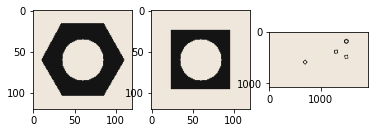

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)
conveyor_f101 =  cv.imread('conveyor_f101.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. State the threshold value (automatically) selected in the operation. Display the output images.

Threshold for hexnut_template is 114.0
Threshold for squarenut_template is 114.0
Threshold for conveyor_f100 is 126.0
Threshold for conveyor_f101 is 126.0


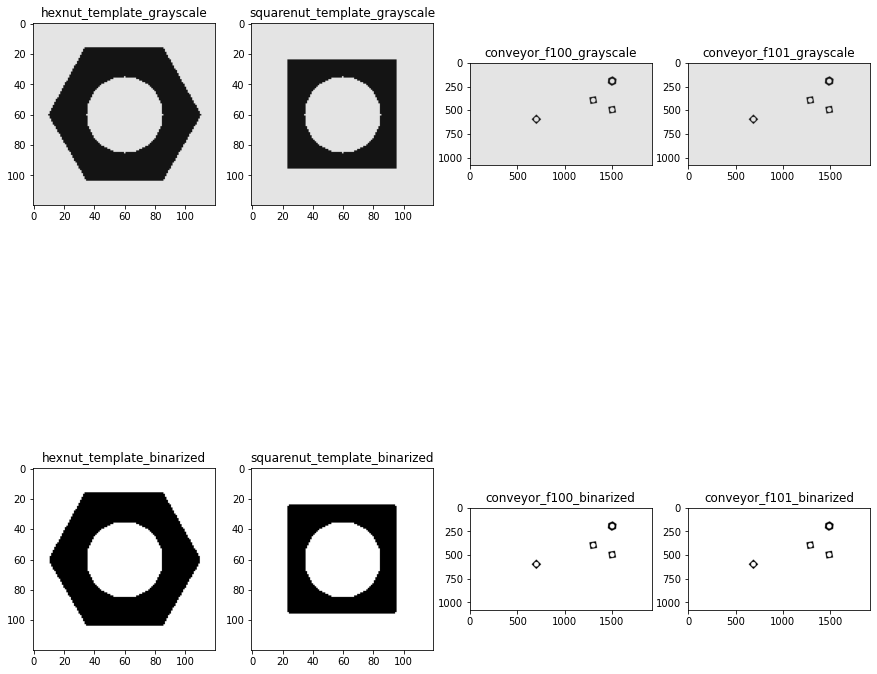

In [4]:
# Otsu's thresholding after Gaussian filtering
images = [hexnut_template, squarenut_template, conveyor_f100, conveyor_f101]
titles = ["hexnut_template", "squarenut_template", "conveyor_f100", "conveyor_f101"]
binarized_images = []

fig,ax = plt.subplots(2,4, figsize = (15,15))

for i in range(len(images)):
    gray_image = cv.cvtColor(images[i], cv.COLOR_RGB2GRAY)
    blur = cv.GaussianBlur(gray_image,(5,5),0)
    threshold_value, binary_image = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    
    binarized_images.append(binary_image) #Because later we want to call these images
    ax[0,i].imshow(cv.cvtColor(gray_image, cv.COLOR_RGB2BGR)) ; ax[0,i].set_title(titles[i]+"_grayscale")
    ax[1,i].imshow(cv.cvtColor(binary_image, cv.COLOR_RGB2BGR)) ; ax[1,i].set_title(titles[i]+"_binarized")
    print("Threshold for %s is %s"%(titles[i], threshold_value))
plt.show()
  

2. Carry out morphological closing to remove small holes inside the foreground. Use a 
3
×
3
 kernel.

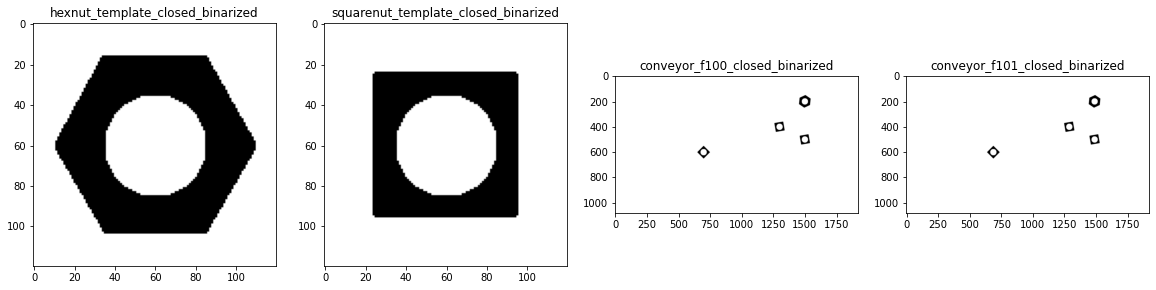

In [12]:
kernel = np.ones((3,3),np.uint8)
closed_binarized_images = []

fig, ax = plt.subplots(1,4, figsize = (20,20))

for i in range(len(images)):
    closing = cv.morphologyEx(binarized_images[i], cv.MORPH_CLOSE, kernel)
    closed_binarized_images.append(closing)
    ax[i].imshow(cv.cvtColor(closing, cv.COLOR_BGR2RGB))
    ax[i].set_title(titles[i]+"_closed_binarized")
plt.show()